In [61]:
%load_ext autoreload
%autoreload 2
import numpy as np
from data_processing import extract_cloud_types, extract_5_by_5_neighborhood, preprocess, combine_training_files
training_data = "training_data/cloud_collocations_10.nc"
y = extract_cloud_types(training_data)
x = preprocess(extract_5_by_5_neighborhood(training_data))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1175, 21, 22)


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier

In [79]:
from networks import SimpleClassifier, DeepClassifier

def build_simple(i):
    return lambda: SimpleClassifier(x[:, i, :, :], y, 32).model

def build_deep(i):
    return lambda: DeepClassifier(x[:, i, :, :], y, 32).model

results = [results]
for i in range(1, 2):
    estimator = KerasClassifier(build_fn=build_deep(i), epochs=200, batch_size=5, verbose=0)
    kfold = KFold(n_splits=10, shuffle=True)
    results += [cross_val_score(estimator, x[:, 0, :, :].reshape(-1, 25), y, cv=kfold)]

In [78]:
[(r.mean(), r.std()) for r in results]

[(0.38645517209407976, 0.03935226563153691),
 (0.39829785036842985, 0.020025591279951131),
 (0.36852818405552218, 0.03472099136659737),
 (0.388150088704381, 0.048369945384629805)]

In [46]:
import glob
files = glob.glob("training_data/cloud_collocations_10_*.nc")
root = Dataset(files[0])
root.groups["input"].variables["modis"]

<class 'netCDF4._netCDF4.Variable'>
float32 modis(samples, channels, ao, xo)
path = /input
unlimited dimensions: samples
current shape = (0, 36, 21, 21)
filling on, default _FillValue of 9.969209968386869e+36 used

In [5]:
import os
os.getcwd()

'/home/simon/src/atrain'

In [7]:
np.sum(y, axis = 0)

array([ 465.,  160.,  160.,   61.,    0.,  175.,   19.,  111.,   24.])

In [9]:
np.prod(y.shape[1:])

9

In [18]:
x = extract_5_by_5_neighborhood(training_data)

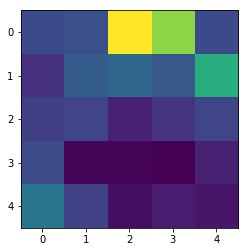

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x[0, 0, :, :])
plt.show()

In [29]:
x 

array([[[[  1.03599258e+02,   1.03817711e+02,   1.11818390e+02,
            1.09961578e+02,   1.03599258e+02],
         [  1.02725464e+02,   1.04363831e+02,   1.04773422e+02,
            1.04172691e+02,   1.07859009e+02],
         [  1.03216972e+02,   1.03435425e+02,   1.02206650e+02,
            1.02807381e+02,   1.03435425e+02],
         [  1.03653870e+02,   1.01414772e+02,   1.01414772e+02,
            1.01223633e+02,   1.02233955e+02],
         [  1.05346848e+02,   1.03298897e+02,   1.01633224e+02,
            1.02042816e+02,   1.01851669e+02]],

        [[  6.87840118e+01,   6.87840118e+01,   6.89751511e+01,
            6.89751511e+01,   6.87840118e+01],
         [  6.87840118e+01,   6.89751511e+01,   6.87840118e+01,
            6.89751511e+01,   6.87840118e+01],
         [  6.85382538e+01,   6.91389923e+01,   6.91389923e+01,
            6.87294006e+01,   6.91389923e+01],
         [  6.90570679e+01,   6.88386230e+01,   6.88386230e+01,
            6.90570679e+01,   6.88386230e+01],

In [ ]:
numpy.sk